In [5]:
import sys
# sys.path.append("/Users/adi/School/Research/pipit")
sys.path.append("/home/rakrish/projects/pipit")
import pipit

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

In [39]:
# sizes = [16, 32, 64, 128, 256]
# traces = [pipit.Trace.from_otf2("/Users/adi/School/Research/traces/tortuga/"+ str(size)) for size in sizes]

In [46]:
# multirun_df = pipit.Trace.multirun_analysis(traces)
# multirun_df.drop(["MPI_Init", "writeSingleField"], axis = 1, inplace = True)

In [47]:
# multirun_df

Name                   computeRhs       gradC2C      MPI_Wait  \
Number of Processes                                             
16                   3.021824e+08  5.266552e+07  3.633939e+07   
32                   3.593897e+08  6.459017e+07  3.239433e+07   
64                   4.527277e+08  1.053937e+08  7.770124e+07   
128                  4.368499e+08  9.569441e+07  9.286200e+07   
256                  4.353201e+08  9.212073e+07  9.426601e+07   

Name                 setGhostCvsInterfaces  endGhostCvsInterfaces  \
Number of Processes                                                 
16                            1.749993e+07           1.516629e+07   
32                            2.007468e+07           1.732592e+07   
64                            3.071575e+07           2.870159e+07   
128                           2.989702e+07           3.065985e+07   
256                           2.908435e+07           3.127370e+07   

Name                    MPI_Bcast           run  advanceTimestep_RK3  \
Number of Processes                                                    
16                   2.223580e+07  1.631792e+07         1.073275e+07   
32                   2.054251e+07  1.876178e+07         1.392044e+07   
64                   2.187696e+07  2.416414e+07         2.195970e+07   
128                  2.392863e+07  2.361672e+07         2.045853e+07   
256                  2.739652e+07  2.704699e+07         1.882587e+07   

Name                 spectralRadius    MPI_Reduce     MPI_Isend  \
Number of Processes                                               
16                     1.540317e+07  3.449538e+06  4.921698e+06   
32                     1.705465e+07  4.612167e+06  5.701082e+06   
64                     1.727128e+07  1.078930e+07  7.023484e+06   
128                    1.696519e+07  9.622369e+06  6.890914e+06   
256                    1.692384e+07  2.373934e+07  6.644304e+06   

Name                 computeVelocityGradient     MPI_Irecv   MPI_Barrier  \
Number of Processes                                                        
16                              2.300964e+06  1.474385e+06  1.127440e+06   
32                              2.921724e+06  1.268819e+06  3.659647e+05   
64                              5.230773e+06  2.961271e+06  1.051799e+06   
128                             5.001051e+06  3.078582e+06  9.929060e+05   
256                             4.508243e+06  2.729943e+06  1.292455e+06   

Name                 MPI_Allreduce      time-loop  
Number of Processes                                
16                   305174.805924  108849.770575  
32                   187252.709041   70491.896850  
64                   337845.564495  136012.578095  
128                  384206.052051  101277.665602  
256                  436932.791537  104188.373243

In [64]:
# USES THE RESULT ABOVE TO SKIP THE TRACE ANALYSIS

import io
import pandas as pd

multirun_df = pd.read_csv(io.StringIO("""
Number of Processes	computeRhs	gradC2C	MPI_Wait	setGhostCvsInterfaces	endGhostCvsInterfaces	MPI_Bcast	run	advanceTimestep_RK3	spectralRadius	MPI_Reduce	MPI_Isend	computeVelocityGradient	MPI_Irecv	MPI_Barrier	MPI_Allreduce	time-loop
16	3.021824e+08	5.266552e+07	3.633939e+07	1.749993e+07	1.516629e+07	2.223580e+07	1.631792e+07	1.073275e+07	1.540317e+07	3.449538e+06	4.921698e+06	2.300964e+06	1.474385e+06	1.127440e+06	305174.805924	108849.770575
32	3.593897e+08	6.459017e+07	3.239433e+07	2.007468e+07	1.732592e+07	2.054251e+07	1.876178e+07	1.392044e+07	1.705465e+07	4.612167e+06	5.701082e+06	2.921724e+06	1.268819e+06	3.659647e+05	187252.709041	70491.896850
64	4.527277e+08	1.053937e+08	7.770124e+07	3.071575e+07	2.870159e+07	2.187696e+07	2.416414e+07	2.195970e+07	1.727128e+07	1.078930e+07	7.023484e+06	5.230773e+06	2.961271e+06	1.051799e+06	337845.564495	136012.578095
128	4.368499e+08	9.569441e+07	9.286200e+07	2.989702e+07	3.065985e+07	2.392863e+07	2.361672e+07	2.045853e+07	1.696519e+07	9.622369e+06	6.890914e+06	5.001051e+06	3.078582e+06	9.929060e+05	384206.052051	101277.665602
256	4.353201e+08	9.212073e+07	9.426601e+07	2.908435e+07	3.127370e+07	2.739652e+07	2.704699e+07	1.882587e+07	1.692384e+07	2.373934e+07	6.644304e+06	4.508243e+06	2.729943e+06	1.292455e+06	436932.791537	104188.373243
"""), sep = "\t")

multirun_df = multirun_df.set_index("Number of Processes")
multirun_df

computeRhs      gradC2C    MPI_Wait  \
Number of Processes                                         
16                   302182400.0   52665520.0  36339390.0   
32                   359389700.0   64590170.0  32394330.0   
64                   452727700.0  105393700.0  77701240.0   
128                  436849900.0   95694410.0  92862000.0   
256                  435320100.0   92120730.0  94266010.0   

                     setGhostCvsInterfaces  endGhostCvsInterfaces   MPI_Bcast  \
Number of Processes                                                             
16                              17499930.0             15166290.0  22235800.0   
32                              20074680.0             17325920.0  20542510.0   
64                              30715750.0             28701590.0  21876960.0   
128                             29897020.0             30659850.0  23928630.0   
256                             29084350.0             31273700.0  27396520.0   

                            run  advanceTimestep_RK3  spectralRadius  \
Number of Processes                                                    
16                   16317920.0           10732750.0      15403170.0   
32                   18761780.0           13920440.0      17054650.0   
64                   24164140.0           21959700.0      17271280.0   
128                  23616720.0           20458530.0      16965190.0   
256                  27046990.0           18825870.0      16923840.0   

                     MPI_Reduce  MPI_Isend  computeVelocityGradient  \
Number of Processes                                                   
16                    3449538.0  4921698.0                2300964.0   
32                    4612167.0  5701082.0                2921724.0   
64                   10789300.0  7023484.0                5230773.0   
128                   9622369.0  6890914.0                5001051.0   
256                  23739340.0  6644304.0                4508243.0   

                     MPI_Irecv  MPI_Barrier  MPI_Allreduce      time-loop  
Number of Processes                                                        
16                   1474385.0    1127440.0  305174.805924  108849.770575  
32                   1268819.0     365964.7  187252.709041   70491.896850  
64                   2961271.0    1051799.0  337845.564495  136012.578095  
128                  3078582.0     992906.0  384206.052051  101277.665602  
256                  2729943.0    1292455.0  436932.791537  104188.373243

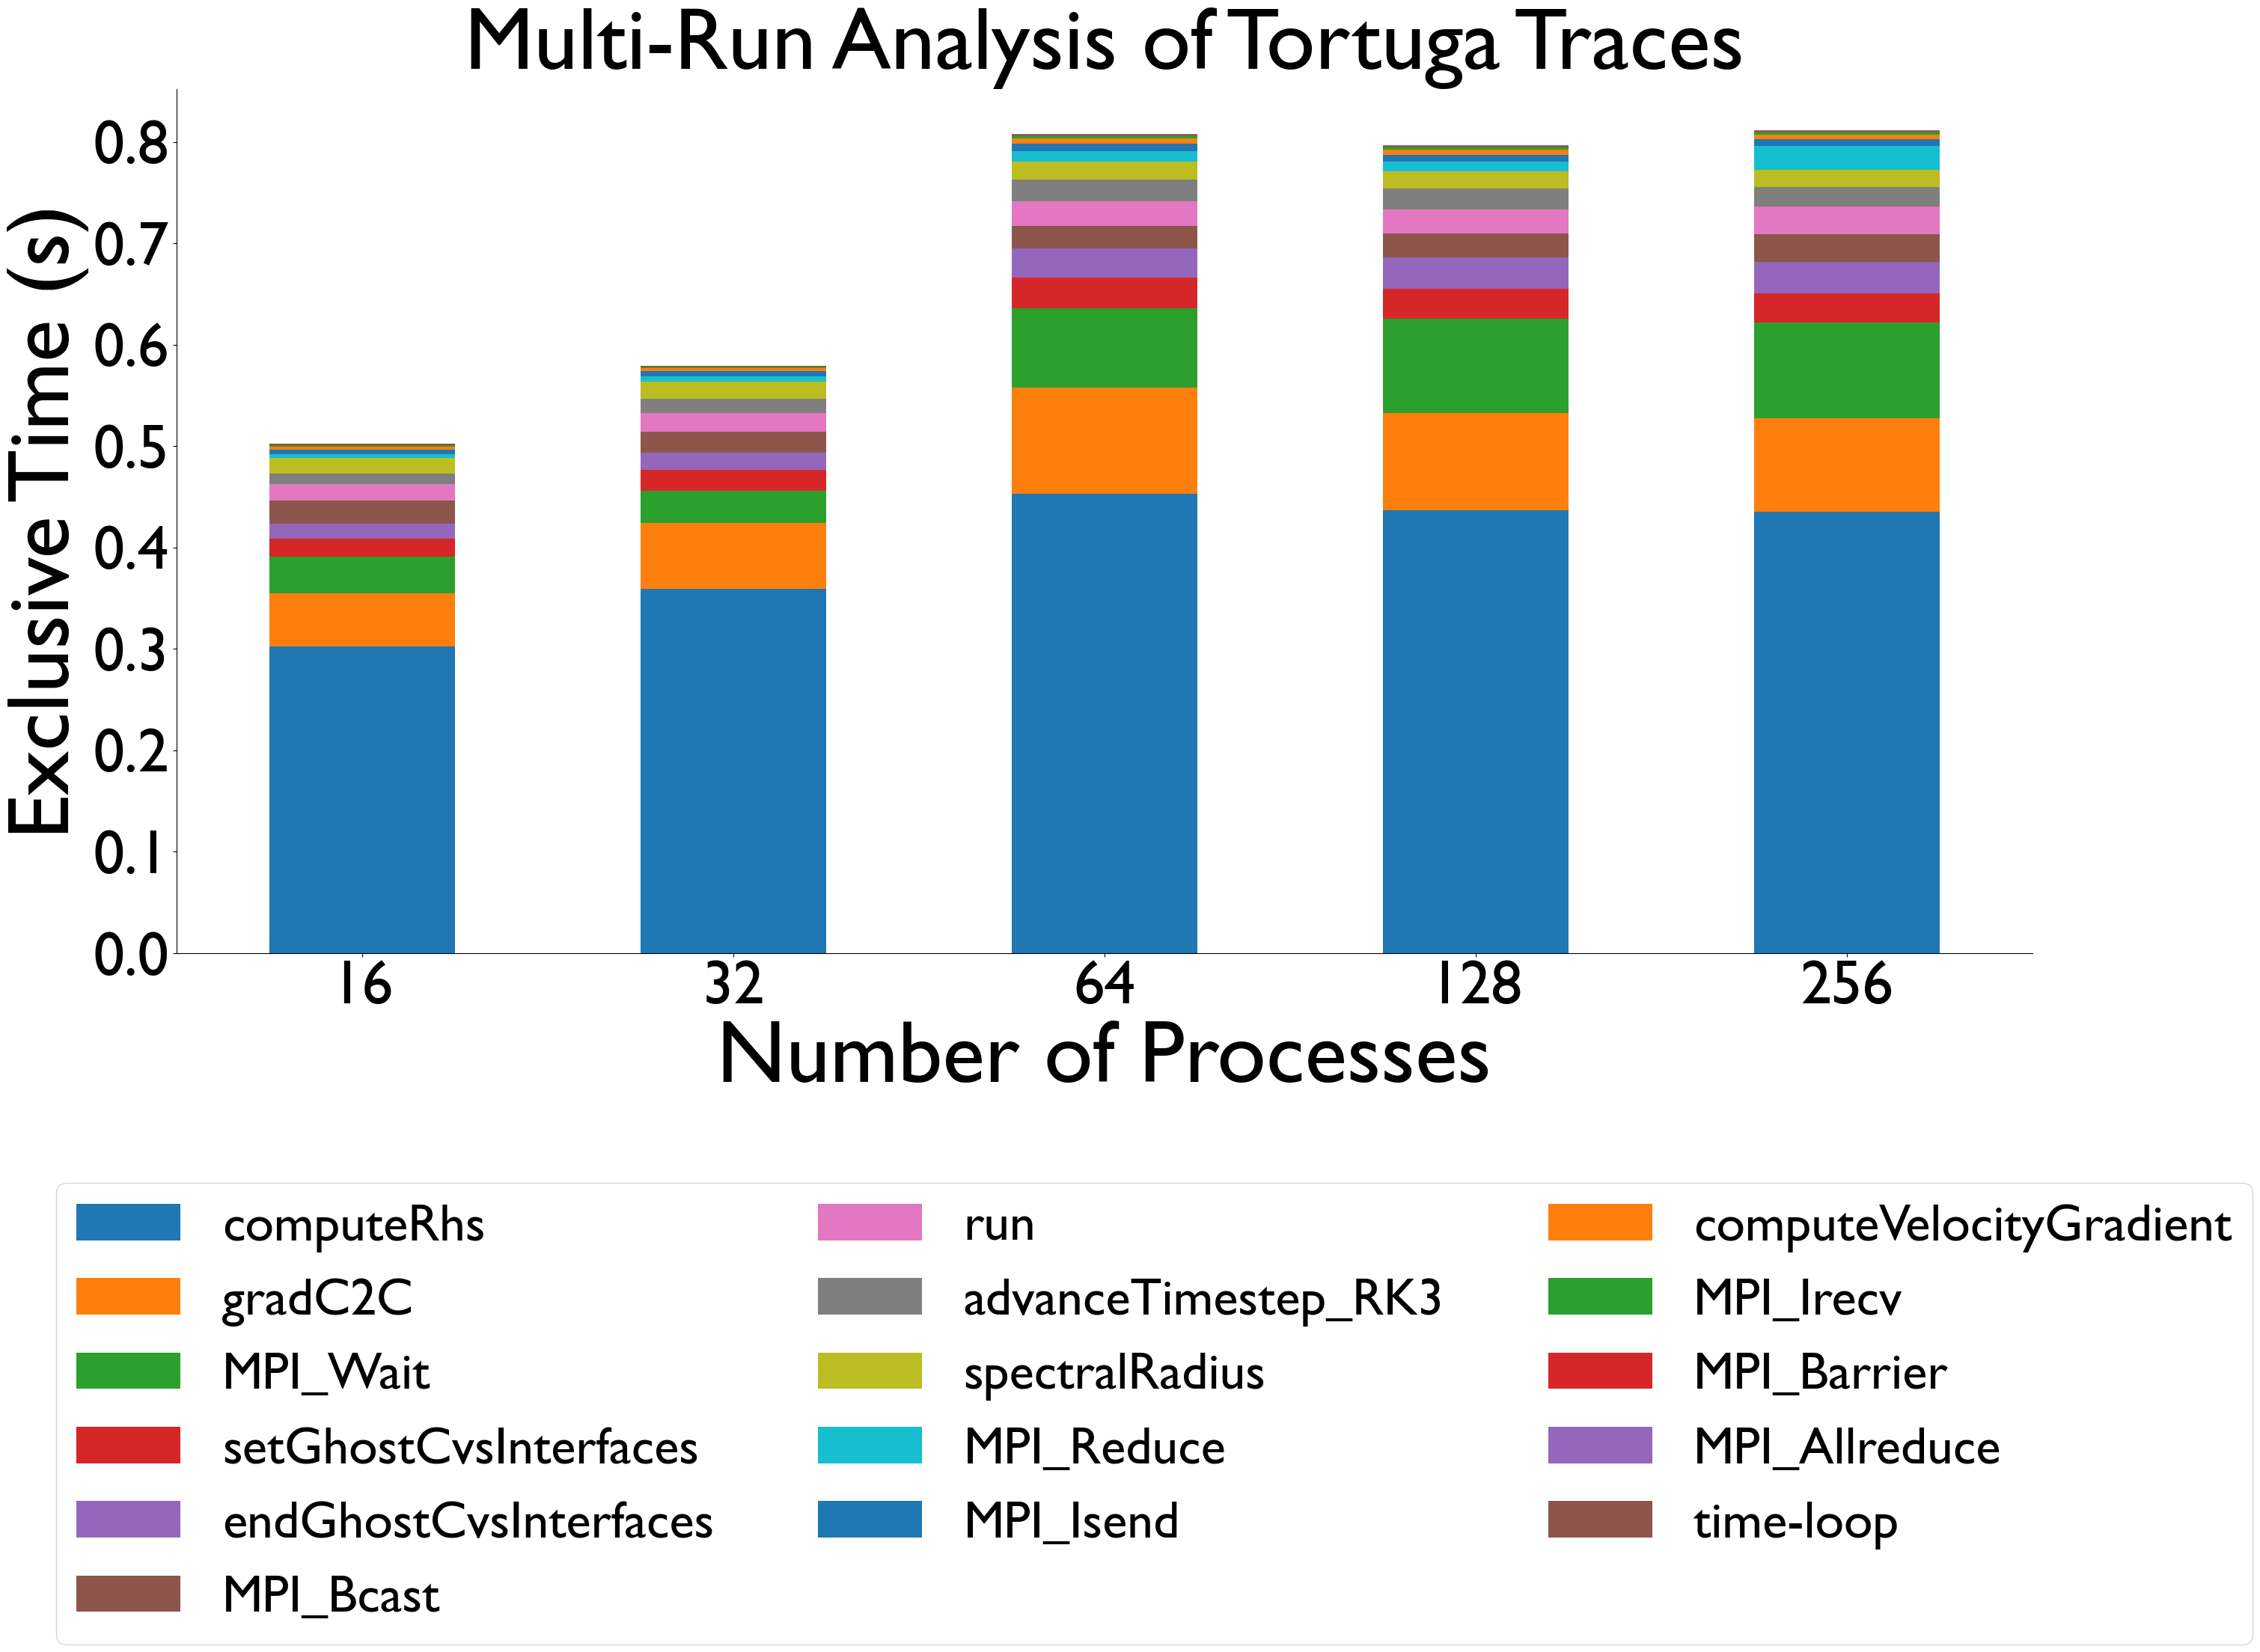

In [65]:
font_entry = fm.FontEntry( fname = './gillsans.ttf',name='gill-sans')
fm.fontManager.ttflist.insert(0, font_entry) 
plt.rcParams['font.family'] = font_entry.name
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams["figure.figsize"] = (32, 15)

ax = plt.gca()
ax.set_xlabel("Number of Processes", fontsize=85)
ax.set_ylabel("Exclusive Time (s)", fontsize=85)
ax.set_title("Multi-Run Analysis of Tortuga Traces", fontsize=85)

multirun_df = multirun_df / 1e9

multirun_df.plot.bar(stacked=True, ax=ax, fontsize=60, rot=0, legend=True)

ax.legend(fontsize=50, loc=(-0.065, -0.8), ncols=3)
ax.yaxis.get_offset_text().set_fontsize(60)

plt.savefig('multirun_tortuga.pdf', bbox_inches='tight')

plt.show()